# NEW HOTS 03 - Testing different architectures on N-MNIST

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%cd '../HOTS'

/Users/laurentperrinet/quantic/science/HomeHots/HOTS_clone_laurent/HOTS


In [2]:
import os
import pickle
from mix_Network import *
dataset = 'nmnist'

# 1. Hots with homeostasis (best results of nbk NEW HOTS 02)

Using downloaded and verified file: ../Data/nmnist_test.zip
Extracting ../Data/nmnist_test.zip to ../Data/


100%|██████████| 40/40 [01:27<00:00,  2.19s/it]


bhatta:52.5% - eucli:50.0% - norm:50.0%
bhatta ->  0.525


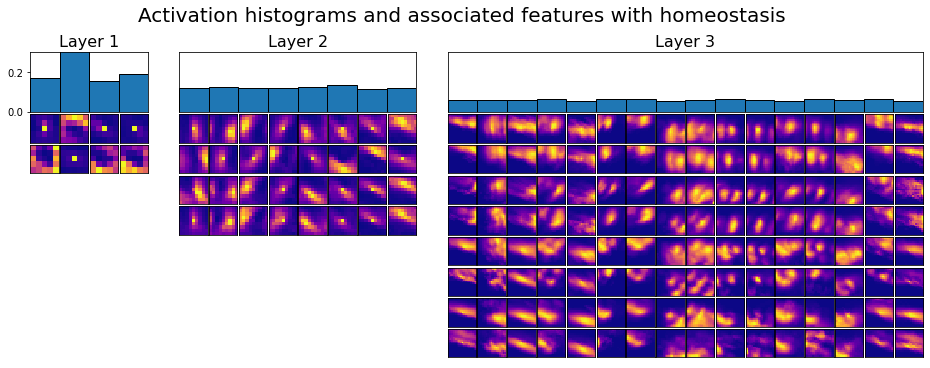

In [3]:
tau = 1
homeo = True
hotshom = network(krnlinit='first', tau=tau, homeo=homeo)
arch = [hotshom.L[i].kernel.shape[1] for i in range(len(hotshom.L))]
fname = "../Records/EXP_03_NMNIST/2020-12-03-mix_hots_"+dataset+hotshom.L[-1].krnlinit+str(tau)+str(homeo)+str(arch)+'.pkl'
if not os.path.isfile(fname):
    loaderhom = hotshom.learning1by1(dataset=dataset)
    trainmaphom, loaderhom, _ = hotshom.training(loaderhom)
    testmaphom, loaderhom, _ = hotshom.testing(loaderhom, trainmaphom)
    with open(fname, 'wb') as file:
        pickle.dump([hotshom, trainmaphom, testmaphom], file, pickle.HIGHEST_PROTOCOL)
else:
    with open(fname, 'rb') as file:
        hotshom, trainmaphom, testmaphom = pickle.load(file)
        
hotshom.plotlayer()
print('bhatta -> ',accuracy(trainmaphom, testmaphom, 'bhatta'))

## 1.1 Testing different tauz

In [4]:
homeo = True
for tau in [0.1, 0.5, 1, 2, 5, 10]:
    hotshom = network(krnlinit='first', tau=tau, homeo=homeo)
    arch = [hotshom.L[i].kernel.shape[1] for i in range(len(hotshom.L))]
    fname = "../Records/EXP_03_NMNIST/2020-12-03-mix_hots_"+dataset+hotshom.L[-1].krnlinit+str(tau)+str(homeo)+str(arch)+'.pkl'
    print(fname)
    if not os.path.isfile(fname):
        loaderhom = hotshom.learning1by1()
        trainmaphom, loaderhom, _ = hotshom.training(loaderhom)
        testmaphom, loaderhom, _ = hotshom.testing(loaderhom, trainmaphom)
        with open(fname, 'wb') as file:
            pickle.dump([hotshom, trainmaphom, testmaphom], file, pickle.HIGHEST_PROTOCOL)
    else:
        with open(fname, 'rb') as file:
            hotshom, trainmaphom, testmaphom = pickle.load(file)
        print(accuracy(trainmaphom, testmaphom, 'bhatta'))

../Records/EXP_03_NMNIST/2020-12-03-mix_hots_nmnistfirst0.1True[4, 8, 16].pkl
Using downloaded and verified file: ../Data/nmnist_test.zip
Extracting ../Data/nmnist_test.zip to ../Data/


100%|██████████| 40/40 [00:13<00:00,  2.88it/s]
/Users/laurentperrinet/quantic/science/HomeHots/HOTS_clone_laurent/HOTS/mix_Network.py:432: RuntimeWarning: invalid value encountered in true_divide
  hist1/=np.sum(hist1)
/Users/laurentperrinet/quantic/science/HomeHots/HOTS_clone_laurent/HOTS/mix_Network.py:433: RuntimeWarning: invalid value encountered in true_divide
  hist2/=np.sum(hist2)
/Users/laurentperrinet/quantic/science/HomeHots/HOTS_clone_laurent/HOTS/mix_Network.py:434: RuntimeWarning: divide by zero encountered in log
  return -np.log(np.sum(np.sqrt(hist1*hist2)))


bhatta:7.5% - eucli:7.5% - norm:7.5%
../Records/EXP_03_NMNIST/2020-12-03-mix_hots_nmnistfirst0.5True[4, 8, 16].pkl
Using downloaded and verified file: ../Data/nmnist_test.zip
Extracting ../Data/nmnist_test.zip to ../Data/


100%|██████████| 40/40 [01:18<00:00,  1.95s/it]


bhatta:27.500000000000004% - eucli:25.0% - norm:25.0%
../Records/EXP_03_NMNIST/2020-12-03-mix_hots_nmnistfirst1True[4, 8, 16].pkl
0.525
../Records/EXP_03_NMNIST/2020-12-03-mix_hots_nmnistfirst2True[4, 8, 16].pkl
Using downloaded and verified file: ../Data/nmnist_test.zip
Extracting ../Data/nmnist_test.zip to ../Data/


100%|██████████| 40/40 [01:23<00:00,  2.09s/it]


bhatta:52.5% - eucli:52.5% - norm:55.00000000000001%
../Records/EXP_03_NMNIST/2020-12-03-mix_hots_nmnistfirst5True[4, 8, 16].pkl
Using downloaded and verified file: ../Data/nmnist_test.zip
Extracting ../Data/nmnist_test.zip to ../Data/


100%|██████████| 40/40 [01:50<00:00,  2.76s/it]


bhatta:47.5% - eucli:47.5% - norm:47.5%
../Records/EXP_03_NMNIST/2020-12-03-mix_hots_nmnistfirst10True[4, 8, 16].pkl
Using downloaded and verified file: ../Data/nmnist_test.zip
Extracting ../Data/nmnist_test.zip to ../Data/


100%|██████████| 40/40 [01:45<00:00,  2.65s/it]


bhatta:57.49999999999999% - eucli:57.49999999999999% - norm:57.49999999999999%


## 1.2 Testing different architectures

In [ ]:
homeo = True
tau = 5
for nblayerz in [1, 2, 3]:
    for nbclust in [4, 8, 16]:
        hotshom = network(krnlinit='first', tau=tau, homeo=homeo, nblay=nblayerz, nbclust= nbclust)
        arch = [hotshom.L[i].kernel.shape[1] for i in range(len(hotshom.L))]
        fname = "../Records/EXP_03_NMNIST/2020-12-03-mix_hots_"+dataset+hotshom.L[-1].krnlinit+str(tau)+str(homeo)+str(arch)+'.pkl'
        print(fname)
        if not os.path.isfile(fname):
            loaderhom = hotshom.learning1by1()
            trainmaphom, loaderhom, _ = hotshom.training(loaderhom)
            testmaphom, loaderhom, _ = hotshom.testing(loaderhom, trainmaphom)
            with open(fname, 'wb') as file:
                pickle.dump([hotshom, trainmaphom, testmaphom], file, pickle.HIGHEST_PROTOCOL)
        else:
            with open(fname, 'rb') as file:
                hotshom, trainmaphom, testmaphom = pickle.load(file)
            print(accuracy(trainmaphom, testmaphom, 'bhatta'))

../Records/EXP_03_NMNIST/2020-12-03-mix_hots_nmnistfirst5True[4].pkl
Using downloaded and verified file: ../Data/nmnist_test.zip
Extracting ../Data/nmnist_test.zip to ../Data/


100%|██████████| 40/40 [00:20<00:00,  1.99it/s]


bhatta:40.0% - eucli:40.0% - norm:37.5%
../Records/EXP_03_NMNIST/2020-12-03-mix_hots_nmnistfirst5True[8].pkl
Using downloaded and verified file: ../Data/nmnist_test.zip
Extracting ../Data/nmnist_test.zip to ../Data/


100%|██████████| 40/40 [00:21<00:00,  1.90it/s]


bhatta:32.5% - eucli:30.0% - norm:30.0%
../Records/EXP_03_NMNIST/2020-12-03-mix_hots_nmnistfirst5True[16].pkl
Using downloaded and verified file: ../Data/nmnist_test.zip
Extracting ../Data/nmnist_test.zip to ../Data/


100%|██████████| 40/40 [00:20<00:00,  1.94it/s]


bhatta:37.5% - eucli:37.5% - norm:37.5%
../Records/EXP_03_NMNIST/2020-12-03-mix_hots_nmnistfirst5True[4, 8].pkl
Using downloaded and verified file: ../Data/nmnist_test.zip
Extracting ../Data/nmnist_test.zip to ../Data/


100%|██████████| 40/40 [00:36<00:00,  1.10it/s]


bhatta:20.0% - eucli:22.5% - norm:22.5%
../Records/EXP_03_NMNIST/2020-12-03-mix_hots_nmnistfirst5True[8, 16].pkl
Using downloaded and verified file: ../Data/nmnist_test.zip
Extracting ../Data/nmnist_test.zip to ../Data/


100%|██████████| 40/40 [00:43<00:00,  1.09s/it]


bhatta:40.0% - eucli:42.5% - norm:40.0%
../Records/EXP_03_NMNIST/2020-12-03-mix_hots_nmnistfirst5True[16, 32].pkl
Using downloaded and verified file: ../Data/nmnist_test.zip
Extracting ../Data/nmnist_test.zip to ../Data/


100%|██████████| 40/40 [01:04<00:00,  1.60s/it]


bhatta:50.0% - eucli:47.5% - norm:47.5%
../Records/EXP_03_NMNIST/2020-12-03-mix_hots_nmnistfirst5True[4, 8, 16].pkl
0.475
../Records/EXP_03_NMNIST/2020-12-03-mix_hots_nmnistfirst5True[8, 16, 32].pkl
Using downloaded and verified file: ../Data/nmnist_test.zip
Extracting ../Data/nmnist_test.zip to ../Data/


 62%|██████▎   | 25/40 [01:57<01:20,  5.36s/it]

# 2. Filtering all TS on the best results

In [ ]:
homeo = True
tau = 5
nblayerz = 3
nbclust =4

hotshom = network(krnlinit='first', tau=tau, homeo=homeo, nblay=nblayerz, nbclust= nbclust)
arch = [hotshom.L[i].kernel.shape[1] for i in range(len(hotshom.L))]
fname = "../Records/EXP_03_NMNIST/2020-12-03-mix_hots_filtall_"+dataset+hotshom.L[-1].krnlinit+str(tau)+str(homeo)+str(arch)+'.pkl'
print(fname)
if not os.path.isfile(fname):
    loaderhom = hotshom.learning1by1(filtering='all')
    trainmaphom, loaderhom, _ = hotshom.training(loaderhom)
    testmaphom, loaderhom, _ = hotshom.testing(loaderhom, trainmaphom)
    with open(fname, 'wb') as file:
        pickle.dump([hotshom, trainmaphom, testmaphom], file, pickle.HIGHEST_PROTOCOL)
else:
    with open(fname, 'rb') as file:
        hotshom, trainmaphom, testmaphom = pickle.load(file)
    print(accuracy(trainmaphom, testmaphom, 'bhatta'))

# 3. Stronger filter on the best results

In [ ]:
homeo = True
tau = 5
nblayerz = 3
nbclust =4

hotshom = network(krnlinit='first', tau=tau, homeo=homeo, nblay=nblayerz, nbclust= nbclust, filt=5)
arch = [hotshom.L[i].kernel.shape[1] for i in range(len(hotshom.L))]
fname = "../Records/EXP_01_LagorceKmeans/2020-12-03-mix_hots_filtallx5_"+dataset+hotshom.L[-1].krnlinit+str(tau)+str(homeo)+str(arch)+'.pkl'
print(fname)
if not os.path.isfile(fname):
    loaderhom = hotshom.learning1by1(filtering='all')
    trainmaphom, loaderhom, _ = hotshom.training(loaderhom)
    testmaphom, loaderhom, _ = hotshom.testing(loaderhom, trainmaphom)
    with open(fname, 'wb') as file:
        pickle.dump([hotshom, trainmaphom, testmaphom], file, pickle.HIGHEST_PROTOCOL)
else:
    with open(fname, 'rb') as file:
        hotshom, trainmaphom, testmaphom = pickle.load(file)
    print(accuracy(trainmaphom, testmaphom, 'bhatta'))

# 4. No homeostasis on the best results

In [ ]:
homeo = False
tau = 5
nblayerz = 3
nbclust =4

hotshom = network(krnlinit='first', tau=tau, homeo=homeo, nblay=nblayerz, nbclust= nbclust)
arch = [hotshom.L[i].kernel.shape[1] for i in range(len(hotshom.L))]
fname = "../Records/EXP_01_LagorceKmeans/2020-12-03-mix_hots_"+dataset+hotshom.L[-1].krnlinit+str(tau)+str(homeo)+str(arch)+'.pkl'
print(fname)
if not os.path.isfile(fname):
    loaderhom = hotshom.learning1by1()
    trainmaphom, loaderhom, _ = hotshom.training(loaderhom)
    testmaphom, loaderhom, _ = hotshom.testing(loaderhom, trainmaphom)
    with open(fname, 'wb') as file:
        pickle.dump([hotshom, trainmaphom, testmaphom], file, pickle.HIGHEST_PROTOCOL)
else:
    with open(fname, 'rb') as file:
        hotshom, trainmaphom, testmaphom = pickle.load(file)
    print(accuracy(trainmaphom, testmaphom, 'bhatta'))

# 5. Training all layers at the same time

In [ ]:
homeo = False
tau = 5
nblayerz = 3
nbclust =4

hotshom = network(krnlinit='first', tau=tau, homeo=homeo, nblay=nblayerz, nbclust= nbclust)
arch = [hotshom.L[i].kernel.shape[1] for i in range(len(hotshom.L))]
fname = "../Records/EXP_01_LagorceKmeans/2020-12-03-mix_hots_learnall_"+dataset+hotshom.L[-1].krnlinit+str(tau)+str(homeo)+str(arch)+'.pkl'
print(fname)
if not os.path.isfile(fname):
    loaderhom = hotshom.learningall()
    trainmaphom, loaderhom, _ = hotshom.training(loaderhom)
    testmaphom, loaderhom, _ = hotshom.testing(loaderhom, trainmaphom)
    with open(fname, 'wb') as file:
        pickle.dump([hotshom, trainmaphom, testmaphom], file, pickle.HIGHEST_PROTOCOL)
else:
    with open(fname, 'rb') as file:
        hotshom, trainmaphom, testmaphom = pickle.load(file)
    print(accuracy(trainmaphom, testmaphom, 'bhatta'))

In [ ]:
homeo = True
tau = 5
nblayerz = 3
nbclust =4

hotshom = network(krnlinit='first', tau=tau, homeo=homeo, nblay=nblayerz, nbclust= nbclust)
arch = [hotshom.L[i].kernel.shape[1] for i in range(len(hotshom.L))]
fname = "../Records/EXP_01_LagorceKmeans/2020-12-03-mix_hots_learnall_"+dataset+hotshom.L[-1].krnlinit+str(tau)+str(homeo)+str(arch)+'.pkl'
print(fname)
if not os.path.isfile(fname):
    loaderhom = hotshom.learningall()
    trainmaphom, loaderhom, _ = hotshom.training(loaderhom)
    testmaphom, loaderhom, _ = hotshom.testing(loaderhom, trainmaphom)
    with open(fname, 'wb') as file:
        pickle.dump([hotshom, trainmaphom, testmaphom], file, pickle.HIGHEST_PROTOCOL)
else:
    with open(fname, 'rb') as file:
        hotshom, trainmaphom, testmaphom = pickle.load(file)
    print(accuracy(trainmaphom, testmaphom, 'bhatta'))

In [ ]:
homeo = True
for tau in [0.1, 0.5, 1, 2, 5, 10, 20]:
    hotshom = network(krnlinit='first', tau=tau, homeo=homeo)
    arch = [hotshom.L[i].kernel.shape[1] for i in range(len(hotshom.L))]
    fname = "../Records/EXP_01_LagorceKmeans/2020-12-03-mix_hots_learnall_"+dataset+hotshom.L[-1].krnlinit+str(tau)+str(homeo)+str(arch)+'.pkl'
    print(fname)
    if not os.path.isfile(fname):
        loaderhom = hotshom.learningall()
        trainmaphom, loaderhom, _ = hotshom.training(loaderhom)
        testmaphom, loaderhom, _ = hotshom.testing(loaderhom, trainmaphom)
        with open(fname, 'wb') as file:
            pickle.dump([hotshom, trainmaphom, testmaphom], file, pickle.HIGHEST_PROTOCOL)
    else:
        with open(fname, 'rb') as file:
            hotshom, trainmaphom, testmaphom = pickle.load(file)
        print(accuracy(trainmaphom, testmaphom, 'bhatta'))

# 6. Training on more videos

In [ ]:
tau = 5
homeo = True
hotshom = network(krnlinit='first', tau=tau, homeo=homeo)
arch = [hotshom.L[i].kernel.shape[1] for i in range(len(hotshom.L))]
fname = "../Records/EXP_01_LagorceKmeans/2020-12-03-mix_hots_200_"+dataset+hotshom.L[-1].krnlinit+str(tau)+str(homeo)+str(arch)+'.pkl'
if not os.path.isfile(fname):
    loaderhom = hotshom.learning1by1()
    trainmaphom, loaderhom, _ = hotshom.training(loaderhom, nb_digit = 200)
    testmaphom, loaderhom, _ = hotshom.testing(loaderhom, trainmaphom)
    with open(fname, 'wb') as file:
        pickle.dump([hotshom, trainmaphom, testmaphom], file, pickle.HIGHEST_PROTOCOL)
else:
    with open(fname, 'rb') as file:
        hotshom, trainmaphom, testmaphom = pickle.load(file)
hotshom.plotlayer()
accuracy(trainmaphom, testmaphom, 'bhatta')